In [1]:
LIST = './dataset/cityscapes_list/train.txt'
IMG_PATH = '/home/yoo/data/cityscapes/leftImg8bit/train/'
GT_PATH = '/home/yoo/data/cityscapes/gtFine/train/'
PLABEL_1 = '/home/yoo/workspace/SSL-Synthetic-Segmentation/Seg-Uncertainty/pseudo/aagc_640x360_b2_single_cutmix_real_bk/gtFine/train/'
PLABEL_2 = '/home/yoo/workspace/SSL-Synthetic-Segmentation/Seg-Uncertainty/pseudo/aagc_640x360_b2_single_cutmix_real/gtFine/train/'

IMG_POSTFIX = '_leftImg8bit.png'
GT_POSTFIX = '_gtFine_color.png'
PLABEL_POSTFIX = '_leftImg8bit_color.png'

import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

SAVE_PATH = '/home/yoo/eval/result/'

def visualize(save=False, save_name='test', **images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 9))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        # plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    if save:
        plt.savefig(SAVE_PATH + save_name + '.png', bbox_inches='tight', dpi=300)
    else:
        plt.show()


import os
from glob import glob

def get_file_lists(path, postfix='*.png'):
    return [{os.path.basename(y) : y} for x in os.walk(path) for y in glob(os.path.join(x[0], postfix))]

def search_key(key, item_lists):
    return [item for item in item_lists if key in item][0]


In [2]:
train_lists = open(LIST, 'r').read().splitlines()
img_lists = get_file_lists(IMG_PATH)
gt_lists = get_file_lists(GT_PATH, '*' + GT_POSTFIX)
plabel_list1 = get_file_lists(PLABEL_1, '*' + PLABEL_POSTFIX)
plabel_list2 = get_file_lists(PLABEL_2, '*' + PLABEL_POSTFIX)

In [3]:
idx = 0
key = os.path.basename(train_lists[idx]).rsplit('_', 1)[0]
print('key: ', key)

# find img_lists
dict_img = search_key(key + IMG_POSTFIX, img_lists)
img = dict_img[list(dict_img)[0]]

# find gt_lists
dict_gt = search_key(key + GT_POSTFIX, gt_lists)
gt = dict_gt[list(dict_gt)[0]]

# find plabel_lists
dict_plabel1 = search_key(key + PLABEL_POSTFIX, plabel_list1)
plabel1 = dict_plabel1[list(dict_plabel1)[0]]

# find plabel_lists2
dict_plabel2 = search_key(key + PLABEL_POSTFIX, plabel_list2)
plabel2 = dict_plabel2[list(dict_plabel2)[0]]

key:  aachen_000000_000019


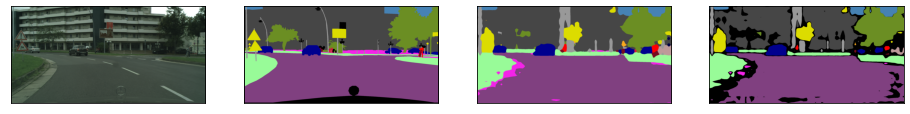

In [4]:
visualize(
        save=False,
        save_name=str(idx),
        image=Image.open(img),
        ground_truth=Image.open(gt),
        psudo_label_1=Image.open(plabel1),
        psudo_label_2=Image.open(plabel2),
)

In [5]:
IMAGE_PATH = '/home/yoo/data/cityscapes/leftImg8bit/val/'
GT_PATH = '/home/yoo/data/cityscapes/gtFine/val/'
IOU_20 = '/home/yoo/eval/20.6-multi_640x360_lsgan_b2/'
IOU_28 = '/home/yoo/eval/28.5-gc_640x360_b1/'
IOU_36 = '/home/yoo/eval/36.6-no_adaptation/'
IOU_44 = '/home/yoo/eval/44.4-aagc_640x360_b2/'
IOU_56 = '/home/yoo/eval/56.7-aagc_640x360_b2_multi_cutmix/'

def get_file_lists(path, postfix='*.png'):
    return [y for x in os.walk(path) for y in glob(os.path.join(x[0], postfix))]

file_list = get_file_lists(IOU_56, '*' + 'png_color.png')
gt_lists = get_file_lists(GT_PATH, '*' + GT_POSTFIX)

In [6]:
for idx in range(len(file_list)):
        
        folder = os.path.basename(file_list[idx]).split('_')[0]
        name = os.path.basename(file_list[idx])
        
        visualize(
                save=True,
                save_name=name,
                image=Image.open(IMAGE_PATH + folder + '/' + name.replace('leftImg8bit.png_color.png', 'leftImg8bit.png')),
                # iou_20=Image.open(IOU_20 + name.replace('leftImg8bit.png_color.png', 'leftImg8bit_color.png')),
                iou_36=Image.open(IOU_36 + name.replace('leftImg8bit.png_color.png', 'leftImg8bit_color.png')),
                iou_28=Image.open(IOU_28 + name),
                iou_44=Image.open(IOU_44 + name),
                iou_56=Image.open(IOU_56 + name),
                GT=Image.open(GT_PATH + folder + '/' + name.replace('leftImg8bit.png_color.png', 'gtFine_color.png')),
        )

<ipython-input-1-31438713520a>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 9))
